In [ ]:
! unzip data.zip

Archive:  data.zip
   creating: data/2010/
  inflating: data/2010/april.csv     
  inflating: data/2010/august.csv    
  inflating: data/2010/december.csv  
  inflating: data/2010/february.csv  
  inflating: data/2010/january.csv   
  inflating: data/2010/july.csv      
  inflating: data/2010/june.csv      
  inflating: data/2010/march.csv     
  inflating: data/2010/may.csv       
  inflating: data/2010/november.csv  
  inflating: data/2010/october.csv   
  inflating: data/2010/september.csv  
  inflating: data/2010/september.xlsx  
   creating: data/2011/
  inflating: data/2011/april.csv     
  inflating: data/2011/august.csv    
  inflating: data/2011/december.csv  
  inflating: data/2011/february.csv  
  inflating: data/2011/january.csv   
  inflating: data/2011/july.csv      
  inflating: data/2011/june.csv      
  inflating: data/2011/march.csv     
  inflating: data/2011/may.csv       
  inflating: data/2011/november.csv  
  inflating: data/2011/october.csv   
  inflating: data/

In [ ]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
months = ['january','february','march','april','may','june','july','august','september','october','november','december']


In [ ]:
month_paths =  glob.glob(os.path.join(os.getcwd(),'data','2010', "*.csv"))
month_paths

['/content/data/2010/july.csv',
 '/content/data/2010/may.csv',
 '/content/data/2010/december.csv',
 '/content/data/2010/june.csv',
 '/content/data/2010/august.csv',
 '/content/data/2010/february.csv',
 '/content/data/2010/october.csv',
 '/content/data/2010/march.csv',
 '/content/data/2010/january.csv',
 '/content/data/2010/september.csv',
 '/content/data/2010/november.csv',
 '/content/data/2010/april.csv']

In [ ]:
def data_loader(year):
    
    month_paths =  glob.glob(os.path.join(os.getcwd(),'data',year, "*.csv"))
    val_array = list()
    i = 0
    for month_path in month_paths:
        #df = pd.read_excel(month_path) 
 
        
        #array = np.asarray(df)
        
        array = np.loadtxt(month_path, delimiter=',')
        
        val = array[0][0]
        val_list = list([year,months[i],val])
        val_array.append(val_list)
        i+=1


    df = pd.DataFrame(val_array,columns = ['Year','Month','NDVI'])
    
    return df

In [ ]:
years = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
ndvi_data = pd.DataFrame(columns = ['Year','Month','NDVI'])

In [ ]:
for i in range(12):
  ndvi_data = pd.concat([ndvi_data,data_loader(years[i])])

In [ ]:
ndvi_data

,Year,Month,NDVI
0,2010,january,3602.0
1,2010,february,2671.0
2,2010,march,5546.0
3,2010,april,3365.0
4,2010,may,5973.0
...,...,...,...
7,2021,august,3162.0
8,2021,september,5181.0
9,2021,october,6499.0
10,2021,november,7557.0


In [ ]:
ndvi_data['NDVI'] = ndvi_data['NDVI'] / 10000
ndvi_data = ndvi_data.reset_index()

In [ ]:
ndvi_data

,index,Year,Month,NDVI
0,0,2010,january,0.3602
1,1,2010,february,0.2671
2,2,2010,march,0.5546
3,3,2010,april,0.3365
4,4,2010,may,0.5973
...,...,...,...,...
139,7,2021,august,0.3162
140,8,2021,september,0.5181
141,9,2021,october,0.6499
142,10,2021,november,0.7557


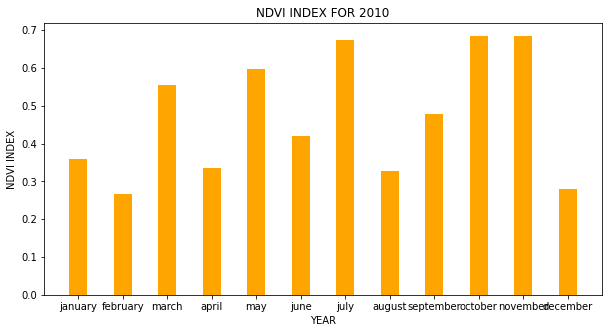

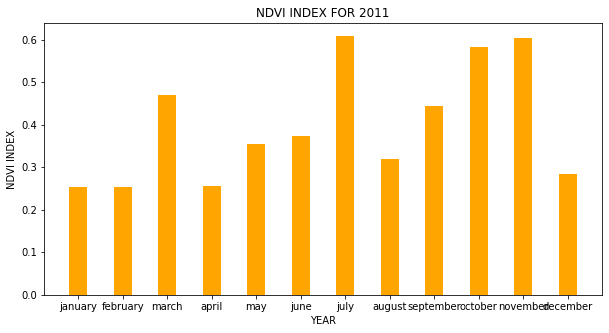

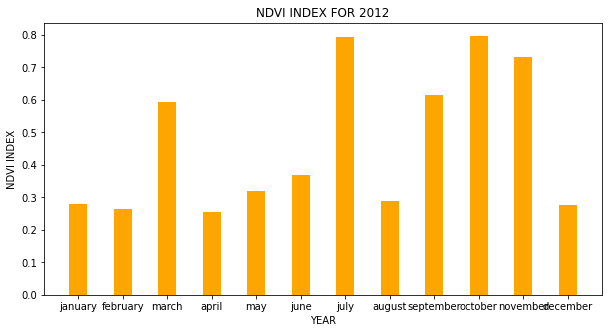

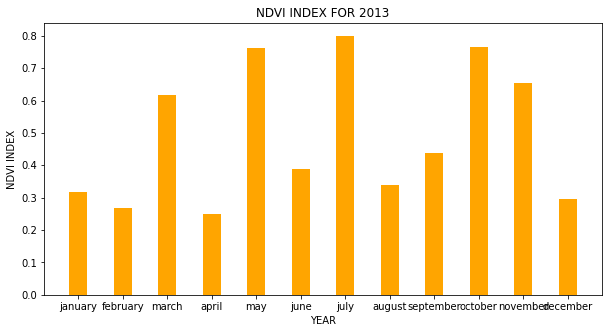

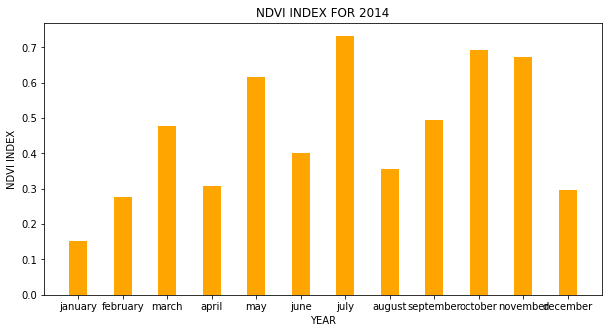

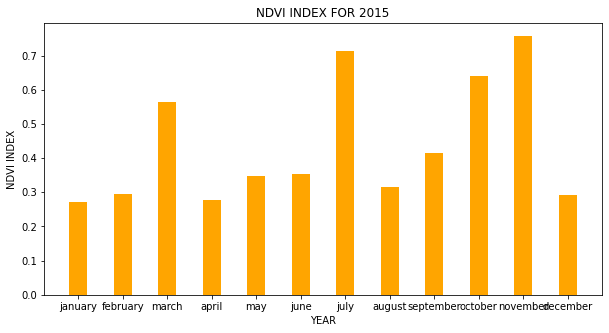

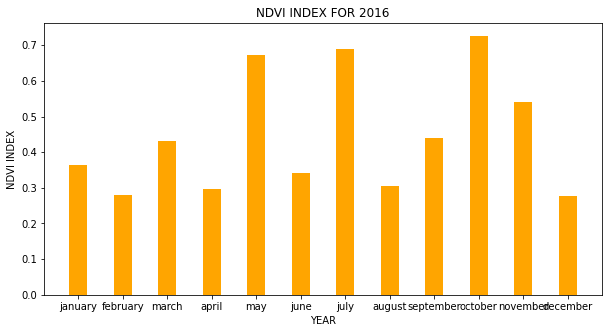

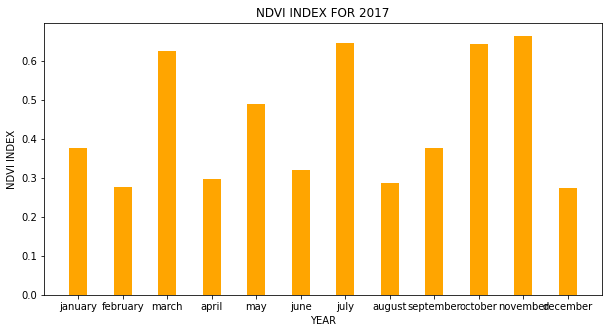

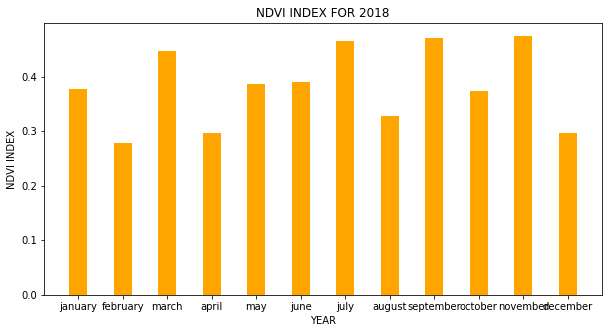

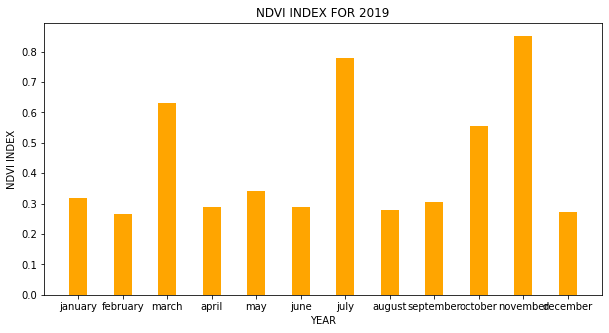

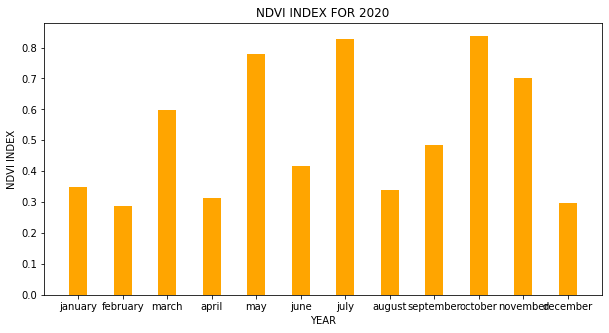

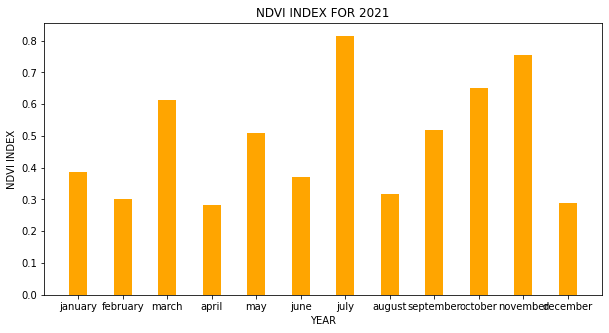

In [ ]:

for i in range(12):  
  df_bar = ndvi_data[ndvi_data['Year'] == years[i]]
  fig = plt.figure(figsize = (10, 5))
  plt.bar(df_bar['Month'], df_bar['NDVI'], color ='orange',
          width = 0.4)
  
  plt.xlabel("YEAR")
  plt.ylabel("NDVI INDEX")
  plt.title("NDVI INDEX FOR " + years[i])
  plt.plot()
  plt.show()
  
  

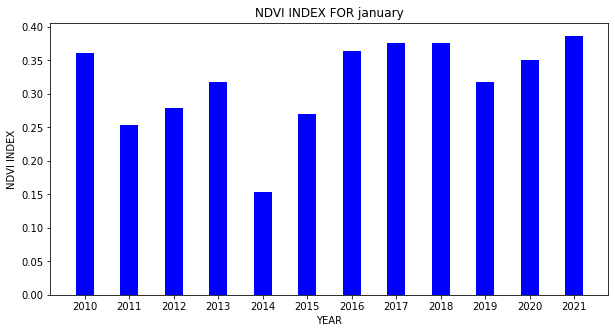

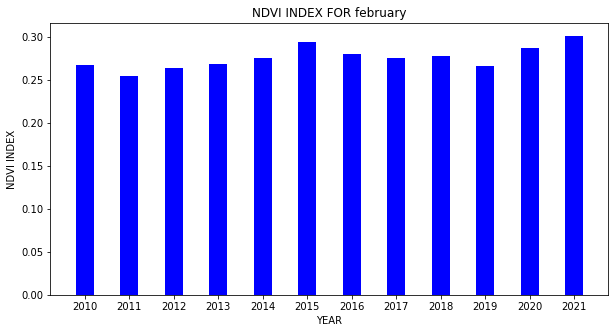

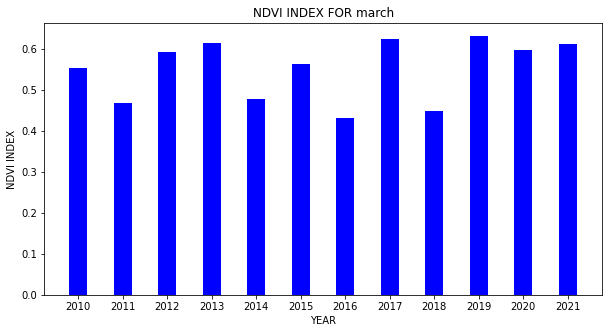

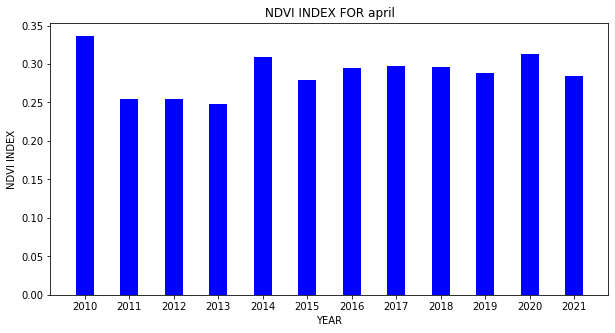

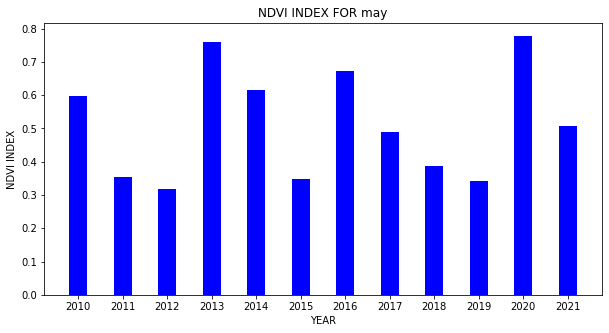

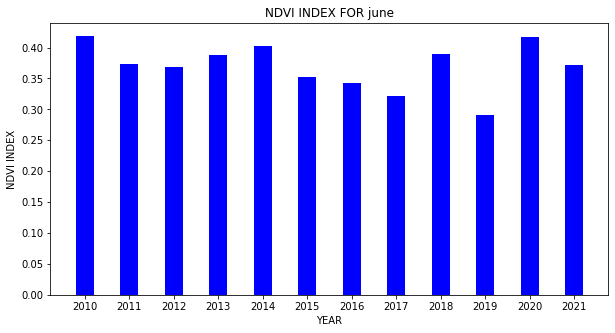

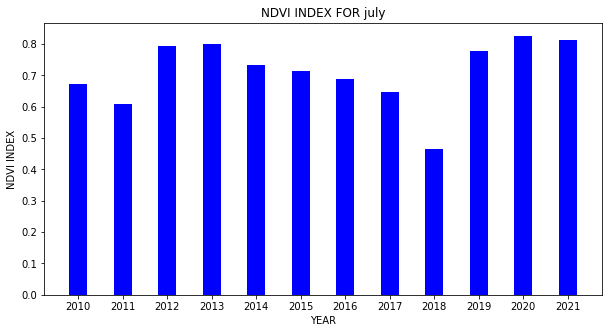

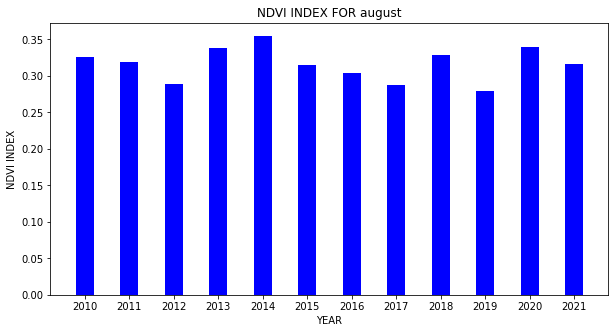

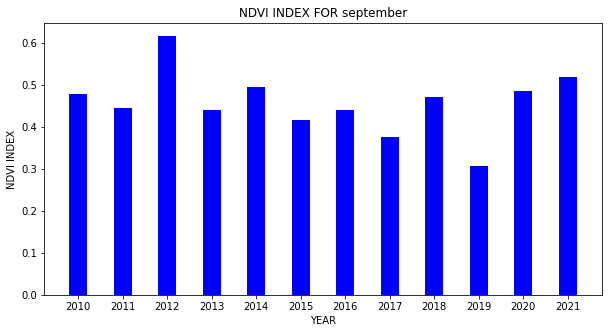

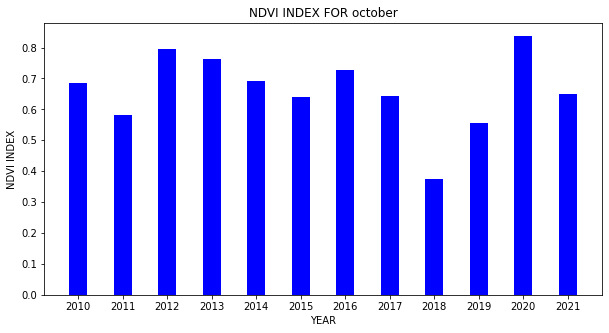

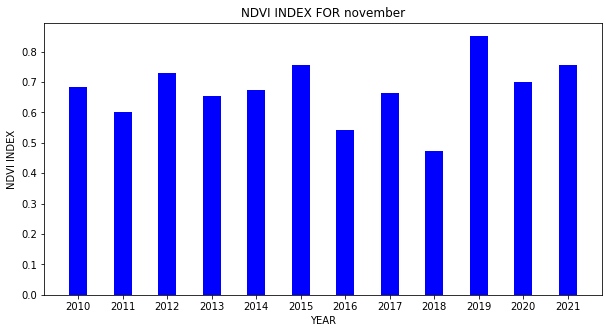

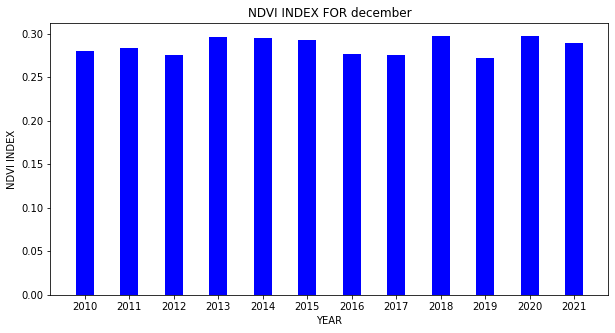

In [ ]:

for i in range(12):
  df_bar = ndvi_data[ndvi_data['Month'] == months[i]]
  fig = plt.figure(figsize = (10, 5))
  plt.bar(df_bar['Year'], df_bar['NDVI'], color ='blue',
          width = 0.4)
  
  plt.xlabel("YEAR")
  plt.ylabel("NDVI INDEX")
  plt.title("NDVI INDEX FOR " + months[i])
  #fig = plt.subplot(1,i+1,1)
  plt.plot()
  plt.show()
  #return fig

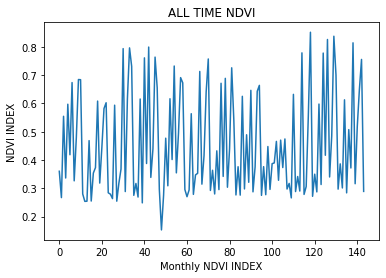

In [ ]:
plt.plot(ndvi_data['NDVI'])
plt.xlabel('Monthly NDVI INDEX')
plt.ylabel('NDVI INDEX')
plt.title('ALL TIME NDVI')
plt.show()

In [ ]:
df_req = ndvi_data['NDVI']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_req=scaler.fit_transform(np.array(df_req).reshape(-1,1))

In [ ]:
df_req

array([[0.29660896],
       [0.16339963],
       [0.57476034],
       [0.26269853],
       [0.63585635],
       [0.38031192],
       [0.74545715],
       [0.24824725],
       [0.46573186],
       [0.76076692],
       [0.75990843],
       [0.1818572 ],
       [0.14436972],
       [0.14522822],
       [0.45170983],
       [0.14608671],
       [0.28759479],
       [0.31520962],
       [0.65173845],
       [0.23694377],
       [0.41679783],
       [0.6139648 ],
       [0.64329661],
       [0.18772357],
       [0.18099871],
       [0.15839176],
       [0.63099156],
       [0.1453713 ],
       [0.2366576 ],
       [0.30791243],
       [0.91715553],
       [0.19401917],
       [0.66232651],
       [0.92087566],
       [0.82744312],
       [0.17498927],
       [0.23494062],
       [0.16626127],
       [0.66232651],
       [0.13678638],
       [0.87036772],
       [0.3359565 ],
       [0.92502504],
       [0.26570325],
       [0.40964373],
       [0.87423093],
       [0.71913006],
       [0.205

In [ ]:
training_size=int(len(df_req)*0.80)
test_size=len(df_req)-training_size
train_data,test_data=df_req[0:training_size,:],df_req[training_size:len(df_req),:1]

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 12
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)


(102, 12)
(102,)
(16, 12)
(16,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(200,return_sequences=True,input_shape=(12,1)))
model.add(LSTM(200,return_sequences=True))
model.add(LSTM(200))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 200)           161600    
                                                                 
 lstm_1 (LSTM)               (None, 12, 200)           320800    
                                                                 
 lstm_2 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 803,401
Trainable params: 803,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,batch_size=6,verbose=1)

Epoch 1/200
17/17 [==============================] - 0s 11ms/step - loss: 0.0014 - val_loss: 0.0271
Epoch 2/200
17/17 [==============================] - 0s 10ms/step - loss: 0.0015 - val_loss: 0.0293
Epoch 3/200
17/17 [==============================] - 0s 9ms/step - loss: 0.0015 - val_loss: 0.0299
Epoch 4/200
17/17 [==============================] - 0s 10ms/step - loss: 0.0013 - val_loss: 0.0275
Epoch 5/200
17/17 [==============================] - 0s 11ms/step - loss: 0.0011 - val_loss: 0.0320
Epoch 6/200
17/17 [==============================] - 0s 13ms/step - loss: 0.0010 - val_loss: 0.0266
Epoch 7/200
17/17 [==============================] - 0s 14ms/step - loss: 0.0028 - val_loss: 0.0324
Epoch 8/200
17/17 [==============================] - 0s 12ms/step - loss: 0.0025 - val_loss: 0.0198
Epoch 9/200
17/17 [==============================] - 0s 12ms/step - loss: 0.0022 - val_loss: 0.0422
Epoch 10/200
17/17 [==============================] - 0s 13ms/step - loss: 0.0055 - val_loss: 0.0167


In [ ]:
import tensorflow as tf


In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1/1 [==============================] - 0s 18ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.08358756979861244

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.1610011722137868

In [ ]:
len(test_data)

29

In [ ]:
x_input=test_data[19:].reshape(1,-1)
x_input.shape

(1, 10)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 12 months
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<12):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} month input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} month output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.41905212]
11
1 month input [0.1874374  0.50736872 0.31334955 0.94648734 0.23365288 0.52253541
 0.71111747 0.86249821 0.19487766 0.41905212]
1 month output [[0.26754662]]
2 month input [0.50736872 0.31334955 0.94648734 0.23365288 0.52253541 0.71111747
 0.86249821 0.19487766 0.41905212 0.26754662]
2 month output [[0.51161665]]
3 month input [0.31334955 0.94648734 0.23365288 0.52253541 0.71111747 0.86249821
 0.19487766 0.41905212 0.26754662 0.51161665]
3 month output [[0.51336515]]
4 month input [0.94648734 0.23365288 0.52253541 0.71111747 0.86249821 0.19487766
 0.41905212 0.26754662 0.51161665 0.51336515]
4 month output [[0.22647804]]
5 month input [0.23365288 0.52253541 0.71111747 0.86249821 0.19487766 0.41905212
 0.26754662 0.51161665 0.51336515 0.22647804]
5 month output [[0.26972398]]
6 month input [0.52253541 0.71111747 0.86249821 0.19487766 0.41905212 0.26754662
 0.51161665 0.51336515 0.22647804 0.26972398]
6 month output [[0.42105627]]
7 month input [0.71111747 0.86249821 0.194

In [ ]:
! pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 4.8 MB/s 
     |████████████████████████████████| 56 kB 5.5 MB/s 
     |████████████████████████████████| 213 kB 64.8 MB/s 
     |████████████████████████████████| 106 kB 65.7 MB/s 
     |████████████████████████████████| 2.3 MB 43.9 MB/s 
     |████████████████████████████████| 84 kB 4.5 MB/s 
     |████████████████████████████████| 272 kB 59.1 MB/s 
     |████████████████████████████████| 84 kB 3.5 MB/s 
     |████████████████████████████████| 55 kB 4.3 MB/s 
     |████████████████████████████████| 54 kB 4.1 MB/s 
     |████████████████████████████████| 64 kB 3.2 MB/s 
     |████████████████████████████████| 80 kB 11.3 MB/s 
     |████████████████████████████████| 68 kB 8.0 MB/s 
     |████████████████████████████████| 46 kB 5.0 MB/s 
     |████████████████████████████████| 593 kB 63.9 MB/s 
     |████████████████████████████████| 4.1 MB 5

In [ ]:
def realoutput(x,y):
    
  

    months = ['january','february','march','april','may','june','july','august','september','october','november','december']
    
    
    def data_loader(year):
        
        month_paths =  glob.glob(os.path.join(os.getcwd(),'data',year, "*.csv"))
        val_array = list()
        i = 0
        for month_path in month_paths:
            #df = pd.read_excel(month_path) 
     
            
            #array = np.asarray(df)
            
            array = np.loadtxt(month_path, delimiter=',')
            
            val = array[x][y]
            val_list = list([year,months[i],val])
            val_array.append(val_list)
            i+=1
    
    
        df = pd.DataFrame(val_array,columns = ['Year','Month','NDVI'])
        
        return df
    
    years = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
    ndvi_data = pd.DataFrame(columns = ['Year','Month','NDVI'])
    
    for i in range(12):
        ndvi_data = pd.concat([ndvi_data,data_loader(years[i])])
    
    
    ndvi_data['NDVI'] = ndvi_data['NDVI'] / 10000
    ndvi_data = ndvi_data.reset_index()
    
    df_req = ndvi_data['NDVI']
    from sklearn.preprocessing import MinMaxScaler
    scaler=MinMaxScaler(feature_range=(0,1))
    df_req=scaler.fit_transform(np.array(df_req).reshape(-1,1))
    
    
    training_size=int(len(df_req)*0.80)
    test_size=len(df_req)-training_size
    train_data,test_data=df_req[0:training_size,:],df_req[training_size:len(df_req),:1]
    
    
    import numpy

    def create_dataset(dataset, time_step=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-time_step-1):
          a = dataset[i:(i+time_step), 0]
          dataX.append(a)
          dataY.append(dataset[i + time_step, 0])
        return numpy.array(dataX), numpy.array(dataY)
    	  
    
    time_step = 12
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, ytest = create_dataset(test_data, time_step)
    
    
    # reshape input to be [samples, time steps, features] which is required for LSTM
    X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
    X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
    
    
    model=Sequential()
    model.add(LSTM(50,return_sequences=True,input_shape=(12,1)))
    model.add(LSTM(50,return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')
    
    model.summary()
    
    model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,batch_size=6,verbose=1)
    
    train_predict=model.predict(X_train)
    test_predict=model.predict(X_test)
    
    train_predict=scaler.inverse_transform(train_predict)
    test_predict=scaler.inverse_transform(test_predict)
    
    
    
    import math
    from sklearn.metrics import mean_squared_error
    math.sqrt(mean_squared_error(y_train,train_predict))
    
    math.sqrt(mean_squared_error(ytest,test_predict))
    x_input=test_data[19:].reshape(1,-1)
    
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
    
    
    
    lst_output=[]
    n_steps=10
    i=0
    while(i<12):
        
        if(len(temp_input)>10):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            print("{} month input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            print("{} month output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
        
    
    lst_output_str = str()
    for output in lst_output:
      lst_output_str= lst_output_str + ' , '+str(output)
    
    return lst_output_str


In [ ]:
! pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gradio as gr


demo = gr.Interface(fn=realoutput, inputs=[gr.inputs.Slider(0,50),gr.inputs.Slider(0,50)], outputs='text')

demo.launch(debug=True)

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:89: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().

Using Embedded Colab Mode (NEW). If you have issues, please use share=True and file an issue at https://github.com/gradio-app/gradio/
Note: opening the browser inspector may crash Embedded Colab Mode.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 12, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
17/17 [==============================] - 5s 89ms/step - loss: 0.0918 - val_loss: 0.0655
Epoch 2/200
17/17 [==============================] - 0s 9ms/step - loss: 0.0420 - va

(<gradio.routes.App at 0x7f9067fd45d0>, 'http://127.0.0.1:7860/', None)